# Wstęp

Kakuro to gra logiczna polegająca na wypełnieniu komórek siatki o rozmiarze n x m liczbami z przedziału od 1 do 9, tak by suma liczb w każdym wierszu i kolumnie była równa określonej wartości tzw. clue oraz aby w jednym wierszu lub kolumnie nie powtarzały się żadne liczby.

# Eksperyment

Rozwiązanie łamigłówek Kakuro o określonych rozmiarach - 5x5, 9x8 i 15x15 przy użyciu algorytmu genetycznego.

In [1]:
import collections
import pygad
import random
import numpy
import time
import copy

9 przykładowych łamigłówek

     * - ściana
     
     _ - puste pole

In [2]:
# I KAKURO 5x5
blank_kakuro = [
    ['*',[0,17],[0,6],'*','*'],
    [[11,0],'_','_',[0,24],'*'],
    [[17,0],'_','_','_',[0,3]],
    ['*',[11,0],'_','_','_'],
    ['*','*',[11,0],'_','_']
]

solved_kakuro = [
    ['*',[0,17],[0,6],'*','*'],
    [[11,0], 8, 3,[0,24],'*'],
    [[17,0], 9, 1, 7,[0,3]],
    ['*',[11,0], 2, 8, 1],
    ['*','*',[11,0], 9, 2]
]


In [9]:
# II KAKURO 5x5
blank_kakuro = [
    ['*','*','*',[0,6],[0,17]],
    ['*','*',[11,23],'_','_'],
    ['*',[19,17],'_','_','_'],
    [[16,0],'_','_','_','*'],
    [[17,0],'_','_','*','*']
]

solved_kakuro = [
    ['*','*','*',[0,6],[0,17]],
    ['*','*',[11,23], 3, 8],
    ['*',[19,17], 8, 2, 9],
    [[16,0], 9, 6, 1,'*'],
    [[17,0], 8, 9,'*','*']
]

In [12]:
# III KAKURO 5x5
blank_kakuro = [
    ['*','*','*',[0,7],[0,24]],
    ['*',[0,24],[12,6],'_','_'],
    [[21,0],'_','_','_','_'],
    [[16,0],'_','_','_','_'],
    [[8,0],'_','_','*','*']
]

solved_kakuro = [
    ['*','*','*',[0,7],[0,24]],
    ['*',[0,24],[12,6], 4, 8],
    [[21,0], 9, 3, 2, 7],
    [[16,0], 8, 2, 1, 9],
    [[8,0], 7, 1,'*','*']
]

In [20]:
# I KAKURO 9x8

blank_kakuro = [
    ['*','*','*',[0,24],[0,10],'*','*','*'],
    ['*','*',[12,30],'_','_',[0,16],[0,21],'*'],
    ['*',[26,0],'_','_','_','_','_','*'],
    ['*',[17,13],'_','_',[8,0],'_','_',[0,3]],
    [[11,0],'_','_','*','*',[0,7],'_','_'],
    [[14,0],'_','_',[0,12],'*',[5,11],'_','_'],
    ['*',[7,0],'_','_',[13,17],'_','_','*'],
    ['*',[25,0],'_','_','_','_','_','*'],
    ['*','*','*',[12,0],'_','_','*','*']
]

solved_kakuro = [
    ['*','*','*',[0,24],[0,10],'*','*','*'],
    ['*','*',[12,30], 8, 4,[0,16],[0,21],'*'],
    ['*',[26,0], 1, 7, 6, 9, 3,'*'],
    ['*',[17,13], 8, 9,[8,0], 7, 1,[0,3]],
    [[11,0], 8, 3,'*','*',[0,7], 5, 2],
    [[14,0], 5, 9,[0,12],'*',[5,11], 4, 1],
    ['*',[7,0], 4, 3,[13,17], 7, 6,'*'],
    ['*',[25,0], 5, 9, 8, 1, 2,'*'],
    ['*','*','*',[12,0], 9, 3,'*','*']
]

In [23]:
#II KAKURO 9X8

blank_kakuro = [
    ['*','*','*',[0,11],[0,12],'*','*','*'],
    ['*','*',[6,21],'_','_',[0,24],[0,3],[0,11]],
    ['*',[36,11],'_','_','_','_','_','_'],
    [[14,0],'_','_','*',[16,5],'_','_','_'],
    [[13,0],'_','_',[11,17],'_','_',[0,20],[0,11]],
    ['*',[0,12],[7,11],'_','_',[16,0],'_','_'],
    [[22,0],'_','_','_',[0,6],[12,13],'_','_'],
    [[26,0],'_','_','_','_','_','_','*'],
    ['*','*','*',[9,0],'_','_','*','*']
]
    
solved_kakuro = [
    ['*','*','*',[0,11],[0,12],'*','*','*'],
    ['*','*',[6,21], 2, 4,[0,24],[0,3],[0,11]],
    ['*',[36,11], 5, 9, 8, 7, 1, 6],
    [[14,0], 5, 9,'*',[16,5], 9, 2, 5],
    [[13,0], 6, 7,[11,17], 3, 8,[0,20],[0,11]],
    ['*',[0,12],[7,11], 5, 2,[16,0], 9, 7],
    [[22,0], 5, 9, 8,[0,6],[12,13], 8, 4],
    [[26,0], 7, 2, 4, 1, 9, 3,'*'],
    ['*','*','*',[9,0], 5, 4,'*','*']
]

In [29]:
# III KAKURO 9x8

blank_kakuro = [
    ['*','*','*',[0,14],[0,10],'*','*','*'],
    ['*','*',[8,3],'_','_',[0,8],'*','*'],
    ['*',[14,0],'_','_','_','_',[0,11],[0,7]],
    ['*',[6,0],'_','_',[15,9],'_','_','_'],
    ['*',[0,15],[10,5],'_','_',[21,4],'_','_'],
    [[13,0],'_','_',[12,9],'_','_',[0,7],'*'],
    [[12,0],'_','_','_',[7,7],'_','_','*'],
    ['*','*',[21,0],'_','_','_','_','*'],
    ['*','*','*',[4,0],'_','_','*','*']
]

solved_kakuro = [
    ['*','*','*',[0,14],[0,10],'*','*','*'],
    ['*','*',[8,3], 2, 6,[0,8],'*','*'],
    ['*',[14,0], 2, 1, 4, 7,[0,11],[0,7]],
    ['*',[6,0], 1, 5,[15,9], 1, 8, 6],
    ['*',[0,15],[10,5], 6, 4,[4,21], 3, 1],
    [[13,0], 9, 4,[12,9], 5, 7,[0,7],'*'],
    [[12,0], 6, 1, 5,[7,7], 2, 5,'*'],
    ['*','*',[21,0], 4, 6, 9, 2,'*'],
    ['*','*','*',[4,0], 1, 3,'*','*']
]

In [36]:
# I KAKURO 15x15
blank_kakuro = [['*','*',[0,4],[0,17],'*','*','*','*',[0,4],[0,17],[0,30],'*','*','*','*'],
                ['*',[11,0],'_','_',[0,11],[0,6],'*',[19,16],'_','_','_','*',[0,4],[0,3],[0,16]],
                ['*', [15,0],'_','_','_','_',[25,17],'_','_','_','_',[11,4],'_','_','_'],
                ['*','*','*',[21,30],'_','_','_','_',[0,6],[21,24],'_','_','_','_','_'],
                ['*','*',[22,11],'_','_','_','_',[19,0],'_','_','_','_','*','*','*'],
                ['*',[14,0],'_','_','_',[0,29],[0,16],[10,0],'_','_',[0,29],[0,6],'*','*','*'],
                ['*',[8,4],'_','_',[15,7],'_','_',[17,0],'_','_','_','_','*',[0,10],[0,17]],
                [[32,0],'_','_','_','_','_','_','*','*',[8,4],'_','_',[11,30],'_','_'],
                [[6,0],'_','_',[7,0],'_','_',[0,24],[0,7],[31,0],'_','_','_','_','_','_'],
                ['*','*','*',[22,0],'_','_','_','_',[12,0],'_','_',[11,10],'_','_','*'],
                ['*','*','*','*',[0,3],[10,11],'_','_','*',[0,3],[13,24],'_','_','_','*'],
                ['*',[0,3],[0,17],[15,16],'_','_','_','_',[19,17],'_','_','_','_','*','*'],
                [[23,0],'_','_','_','_','_',[0,4],[20,16],'_','_','_','_',[0,16],[0,3],'*'],
                [[18,0],'_','_','_',[20,0],'_','_','_','_',[18,0],'_','_','_','_','*'],
                ['*','*','*','*',[11,0],'_','_','_','*','*','*',[11,0],'_','_','*']
                
]

solved_kakuro = [['*','*',[0,4],[0,17],'*','*','*','*',[0,4],[0,17],[0,30],'*','*','*','*'],
                ['*',[11,0], 3, 8,[0,11],[0,6],'*',[19,16], 3, 9, 7,'*',[0,4],[0,3],[0,16]],
                ['*', [15,0], 1, 9, 3, 2,[25,17], 7, 1, 8, 9,[11,4], 3, 1, 7],
                ['*','*','*',[21,30], 1, 3, 8, 9,[0,6],[21,24], 6, 3, 1, 2, 9],
                ['*','*',[22,11], 7, 5, 1, 9,[19,0], 3, 7, 8, 1,'*','*','*'],
                ['*',[14,0], 3, 9, 2,[0,29],[0,16],[10,0], 2, 8,[0,29],[0,6],'*','*','*'],
                ['*',[8,4], 2, 6,[15,7], 8, 7,[17,0], 1, 9, 5, 2,'*',[0,10],[0,17]],
                [[32,0], 3, 1, 8, 4, 7, 9,'*','*',[8,4], 7, 1,[11,30], 3, 8],
                [[6,0], 1, 5,[7,0], 2, 5,[0,24],[0,7],[31,0], 1, 8, 3, 6, 4, 9],
                ['*','*','*',[22,0], 1, 9, 8, 4,[12,0], 3, 9,[11,10], 9, 2,'*'],
                ['*','*','*','*',[0,3],[10,11], 9, 1,'*',[0,3],[13,24], 4, 8, 1,'*'],
                ['*',[0,3],[0,17],[15,16], 1, 5, 7,2,[19,17], 2, 9, 1, 7,'*','*'],
                [[23,0], 1, 8, 9, 2, 3,[0,4],[20,16], 9, 1, 7, 3,[0,16],[0,3],'*'],
                [[18,0], 2, 9, 7,[20,0], 2, 1, 9, 8,[18,0], 8, 2, 7, 1,'*'],
                ['*','*','*','*',[11,0], 1, 3, 7,'*','*','*',[11,0], 9, 2,'*']
                
]


In [41]:
# II KAKURO 15x15

blank_kakuro = [['*',[0,3],[0,4],[0,17],'*',[0,23],[0,11],'*','*',[0,7],[0,17],[0,10],'*','*','*'],
                [[13,0],'_','_','_',[13,16],'_','_','*',[14,17],'_','_','_','*',[0,4],[0,17]],
                [[29,0], '_','_','_','_','_','_',[20,4],'_','_','_','_',[12,17],'_','_'],
                ['*',[0,3],[0,16],[32,17],'_','_','_','_','_','_',[22,17],'_','_','_','_'],
                [[18,0],'_','_','_',[0,16],[3,0],'_','_','*',[18,10],'_','_','_','*','*'],
                [[25,0],'_','_','_','_',[0,3],'*','*',[12,23],'_','_','*','*','*','*'],
                ['*','*','*',[11,0],'_','_',[0,29],[8,7],'_','_','*','*','*','*','*'],
                ['*','*','*','*',[23,0],'_','_','_','_','_',[0,17],'*','*','*','*'],
                ['*','*','*','*','*',[27,0],'_','_','_','_','_',[0,4],'*','*','*'],
                ['*','*','*','*','*',[8,3],'_','_','*',[10,0],'_','_',[0,3],[0,4],[0,17]],
                ['*','*','*',[0,17],[10,10],'_','_','*',[0,17],[0,28],[15,0],'_','_','_','_'],
                ['*',[0,16],[12,3],'_','_','_',[0,24],[17,3],'_','_',[0,6],[12,3],'_','_','_'],
                [[21,0],'_','_','_','_',[28,4],'_','_','_','_','_','_',[0,16],[0,4],[0,17]],
                [[11,0],'_','_',[15,0],'_','_','_','_',[30,0],'_','_','_','_','_','_'],
                ['*','*','*',[10,0],'_','_','_','*',[7,0],'_','_',[18,0],'_','_','_']
                
]

solved_kakuro = [['*',[0,3],[0,4],[0,17],'*',[0,23],[0,11],'*','*',[0,7],[0,17],[0,10],'*','*','*'],
                [[13,0], 1, 3, 9,[13,16], 8, 5,'*',[14,17], 2, 9, 3,'*',[0,4],[0,17]],
                [[29,0], 2, 1, 8, 9, 6, 3,[20,4], 9, 1, 8, 2,[12,17], 3, 9],
                ['*',[0,3],[0,16],[32,17], 7, 9, 1, 3, 8, 4,[22,17], 4, 9, 1, 8],
                [[18,0], 2, 7, 9,[0,16],[3,0], 2, 1,'*',[18,10], 9, 1, 8,'*','*'],
                [[25,0], 1, 9, 8, 7,[0,3],'*','*',[12,23], 4, 8,'*','*','*','*'],
                ['*','*','*',[11,0], 9, 2,[0,29],[8,7], 6, 2,'*','*','*','*','*'],
                ['*','*','*','*',[23,0], 1, 9, 2, 8, 3,[0,17],'*','*','*','*'],
                ['*','*','*','*','*',[27,0], 5, 4, 9, 1, 8,[0,4],'*','*','*'],
                ['*','*','*','*','*',[8,3], 7, 1,'*',[10,0], 9, 1,[0,3],[0,4],[0,17]],
                ['*','*','*',[0,17],[10,10], 2, 8,'*',[0,17],[0,28],[15,0], 3, 2, 1, 9],
                ['*',[0,16],[12,3], 8, 3, 1,[0,24],[17,3], 8, 9,[0,6],[12,3],1, 3, 8],
                [[21,0], 7, 1, 9, 4,[28,4], 8, 1, 9, 5, 3, 2,[0,16],[0,4],[0,17]],
                [[11,0], 9, 2,[15,0], 1, 3, 9, 2,[30,0], 8, 2, 1, 7, 3, 9],
                ['*','*','*',[10,0], 2, 1, 7,'*',[7,0], 6, 1,[18,0], 9, 1, 8]
                
]


In [49]:
# III KAKURO 15x15

blank_kakuro = [['*','*',[0,16],[0,10],'*',[0,17],[0,4],[0,34],'*','*','*','*','*','*','*'],
                ['*',[10,0],'_','_',[19,4],'_','_','_','*','*','*','*','*','*','*'],
                ['*',[29,0],'_','_','_','_','_','_',[0,10],'*','*','*','*',[0,4],[0,3]],
                ['*','*',[5,15],'_','_','*',[10,17],'_','_','*','*','*',[3,11],'_','_'],
                ['*',[5,23],'_','_','*',[21,30],'_','_','_','*','*',[9,17],'_','_','_'],
                [[11,0],'_','_','*',[23,4],'_','_','_','_',[0,17],[11,0],'_','_','*','*'],
                [[12,0],'_','_',[11,0],'_','_','*',[9,0],'_','_',[10,30],'_','_',[0,16],'*'],
                [[10,0],'_','_',[10,10],'_','_',[0,17],'*',[17,0],'_','_',[8,4],'_','_',[0,23]],
                ['*',[3,0],'_','_',[15,4],'_','_',[0,30],'*',[9,0],'_','_',[12,0],'_','_'],
                ['*','*',[5,0],'_','_',[15,0],'_','_',[15,0],[8,4],'_','_',[9,0],'_','_'],
                ['*',[0,16],[4,17],'_','_','*',[18,0],'_','_','_','_','*',[8,10],'_','_'],
                [[20,0],'_','_','_','*','*',[15,0],'_','_','_','*',[6,17],'_','_','*'],
                [[16,0],'_','_','*','*','*',[10,0],'_','_',[0,4],[10,16],'_','_',[0,17],'*'],
                ['*','*','*','*','*','*','*',[32,0],'_','_','_','_','_','_','*'],
                ['*','*','*','*','*','*','*',[17,0],'_','_','_',[0,11],'_','_','*']
                
]

solved_kakuro = [['*','*',[0,16],[0,10],'*',[0,17],[0,4],[0,34],'*','*','*','*','*','*','*'],
                ['*',[10,0], 7, 3,[19,4], 9, 3, 7,'*','*','*','*','*','*','*'],
                ['*',[29,0], 9, 2, 3, 8, 1, 6,[0,10],'*','*','*','*',[0,4],[0,3]],
                ['*','*',[5,15], 4, 1,'*',[10,17], 8, 2,'*','*','*',[3,11], 1, 2],
                ['*',[5,23], 4, 1,'*',[21,30], 8, 9, 4,'*','*',[9,17], 5, 3, 1],
                [[11,0], 6, 5,'*',[23,4], 7, 9, 4, 3,[0,17],[11,0], 8, 3,'*','*'],
                [[12,0], 9, 3,[11,0], 3, 8,'*',[9,0], 1, 8,[10,30], 9, 1,[0,16],'*'],
                [[10,0], 8, 2,[10,10], 1, 9,[0,17],'*',[17,0], 9, 8,[8,4], 2, 6,[0,23]],
                ['*',[3,0], 1, 2,[15,4], 6, 9,[0,30],'*',[9,0], 6, 3,[12,0], 3, 9],
                ['*','*',[5,0], 4, 1,[15,0], 8, 7,[15,0],[8,4], 7, 1,[9,0], 1, 8],
                ['*',[0,16],[4,17], 1, 3,'*',[18,0], 6, 2, 1, 9,'*',[8,10], 2, 6],
                [[20,0], 9, 8, 3,'*','*',[15,0], 8, 4, 3,'*',[6,17], 2, 4,'*'],
                [[16,0], 7, 9,'*','*','*',[10,0], 9, 1,[0,4],[10,16], 9, 1,[0,17],'*'],
                ['*','*','*','*','*','*','*',[32,0], 3, 1, 7, 8, 4, 9,'*'],
                ['*','*','*','*','*','*','*',[17,0], 5, 3, 9,[0,11], 3, 8,'*']
]


In [3]:
def print_kakuro(kakuro): #by wyswietlic kakuro
  for i in kakuro:
    print(i)

In [4]:
def check_right(row,column,kakuro):
    try:
        if isinstance(kakuro[row][column + 1], int):
            return True
    except:
        return False
    
def check_down(row,column,kakuro):
    try:
        if isinstance(kakuro[row + 1][column], int):
            return True
    except:
        return False    
    

def c_duplicates_hor(kakuro): #sprawdzamy, czy dana wartosc sie powtarza w poziomie oraz zliczamy powtórzenia
    counter = 0
    for row in range(len(kakuro)):
        l = []
        for column in range(len(kakuro[0])):
            if isinstance(kakuro[row][column], int):
                l.append(kakuro[row][column])
                if check_right(row, column, kakuro):
                    continue
                else:
                    z = sum([value - 1 for key, value in collections.Counter(l).items() if value > 1] )
                    counter += z
                    l = []
    return counter                


def c_duplicates_vert(kakuro): #sprawdzamy, czy dana wartosc sie powtarza w poziomie oraz zliczamy powtórzenia
    counter = 0
    for column in range(len(kakuro[0])):
        l = []
        for row in range(len(kakuro)):
            if isinstance(kakuro[row][column], int):
                l.append(kakuro[row][column])
                if check_down(row, column, kakuro):
                    continue
                else:
                    z = sum([value - 1 for key, value in collections.Counter(l).items() if value > 1] )
                    counter += z
                    l = []
    return counter   


def c_sum_hor(kakuro): #zliczenie różnic pomiędzy wartością z pola (clue) a sumą wpisanych liczb - poziomo (wartosc bezwzgledna) 
    counter = 0
    for row in range(len(kakuro)):
        l = []
        suma = 0
        for column in range(len(kakuro[0])):
            if isinstance(kakuro[row][column], list):
                suma = kakuro[row][column][0]
                continue
            if isinstance(kakuro[row][column], int):   
                l.append(kakuro[row][column])
                if check_right(row, column, kakuro):
                    continue
                else:
                    counter += abs(sum(l)-suma)
                    l = []
    return counter    


def c_sum_vert(kakuro): #zliczenie różnic pomiędzy wartością z pola (clue) a sumą wpisanych liczb - pionowo (wartosc bezwzgledna) 
    counter = 0
    for column in range(len(kakuro[0])):
        l = []
        suma = 0
        for row in range(len(kakuro)):
            if isinstance(kakuro[row][column], list):
                suma = kakuro[row][column][1]
                continue
            if isinstance(kakuro[row][column], int):   
                l.append(kakuro[row][column])
                if check_down(row, column, kakuro):
                    continue
                else:
                    counter += abs(sum(l) - suma)
                    l = []
    return counter 


In [5]:
def fill_in(array): #wypełnianie pustych pól w kakuro
    copy_kakuro = copy.deepcopy(blank_kakuro)
    k = 0
    for row in range(len(copy_kakuro)):
        for column in range(len(copy_kakuro[0])):
            if copy_kakuro[row][column] == '_':
                copy_kakuro[row][column] = int(array[k])
                k += 1
    return copy_kakuro
    

In [6]:
gene_space = [1, 2, 3, 4, 5, 6, 7, 8, 9] #wszystkie mozliwe cyfry, jakie mozna wpisac w puste pola kakuro

def fitness_func(solution, solution_idx): #fitness - suma zliczonych powtorzen pionow/poziomo i roznic pomiędzy clue a wpisanymi w puste pola cyframi
    copy_kakuro = fill_in(solution)
    fitness = -(c_duplicates_hor(copy_kakuro) + c_duplicates_vert(copy_kakuro) + c_sum_vert(copy_kakuro) + c_sum_hor(copy_kakuro))
    return fitness

fitness_function = fitness_func

In [7]:
def counted(kakuro): #zliczenie pustych pól 
    counter = 0
    for row in range(len(kakuro)):
        for column in range(len(kakuro[0])): 
            if blank_kakuro[row][column]=='_':
                counter += 1
    return counter 


In [34]:
#Wybrane parametry
sol_per_pop = 100
num_genes = counted(blank_kakuro) #liczba pustych pól w danym kakuro
num_parents_mating = 50 #(ok. 50%)
num_generations = 300
keep_parents = 4 #mały %
parent_selection_type = "tournament"
crossover_type = "single_point"
mutation_type = 'random'
mutation_percent_genes = 0.1

start_time = time.time() #mierzenie czasu

ga_instance = pygad.GA(gene_space=gene_space,
                    num_generations=num_generations,
                    num_parents_mating=num_parents_mating,
                    fitness_func=fitness_function,
                    sol_per_pop=sol_per_pop,
                    num_genes=num_genes,
                    parent_selection_type=parent_selection_type,
                    keep_parents=keep_parents,
                    crossover_type=crossover_type,
                    mutation_type=mutation_type,
                    mutation_percent_genes=mutation_percent_genes
            
                    )

ga_instance.run()
end_time = time.time()
time_e = end_time - start_time

Niektóre kakuro mają więcej niż jedno poprawne rozwiązanie, dlatego niektóre znalezione rozwiązania mogą się róznić od poprawnego mimo fitness = 0.

Parameters of the best solution: [8. 3. 9. 1. 7. 2. 8. 1. 9. 2.]
Fitness value of the best solution = 0
Time elapsed: 3.5108931064605713

Found solution:
['*', [0, 17], [0, 6], '*', '*']
[[11, 0], 8, 3, [0, 24], '*']
[[17, 0], 9, 1, 7, [0, 3]]
['*', [11, 0], 2, 8, 1]
['*', '*', [11, 0], 9, 2]
Correct solution:
['*', [0, 17], [0, 6], '*', '*']
[[11, 0], 8, 3, [0, 24], '*']
[[17, 0], 9, 1, 7, [0, 3]]
['*', [11, 0], 2, 8, 1]
['*', '*', [11, 0], 9, 2]


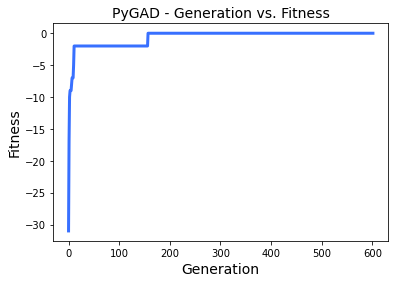

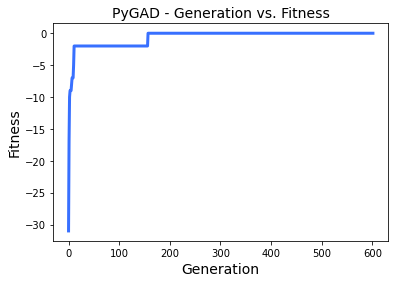

In [13]:
#I KAKURO 5x5
#podsumowanie: najlepsze znalezione rozwiazanie (chromosom+ocena)
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution: {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))


#czas
print("Time elapsed: {time_e}".format(time_e=time_e) + "\n")

print("Found solution:")
print_kakuro(fill_in(solution))

print("Correct solution:")
print_kakuro(solved_kakuro)

#wyswietlenie wykresu: jak zmieniala sie ocena na przestrzeni pokolen
ga_instance.plot_fitness()

Parameters of the best solution: [3. 8. 9. 1. 9. 8. 6. 2. 9. 8.]
Fitness value of the best solution = -1
Time elapsed: 3.369253396987915

Found solution:
['*', '*', '*', [0, 6], [0, 17]]
['*', '*', [11, 23], 3, 8]
['*', [19, 17], 9, 1, 9]
[[16, 0], 8, 6, 2, '*']
[[17, 0], 9, 8, '*', '*']
Correct solution:
['*', '*', '*', [0, 6], [0, 17]]
['*', '*', [11, 23], 3, 8]
['*', [19, 17], 8, 2, 9]
[[16, 0], 9, 6, 1, '*']
[[17, 0], 8, 9, '*', '*']


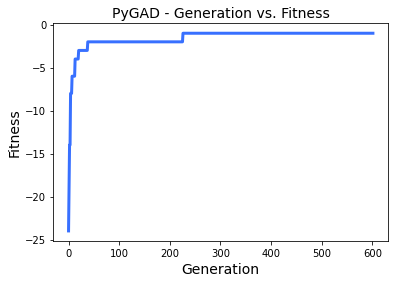

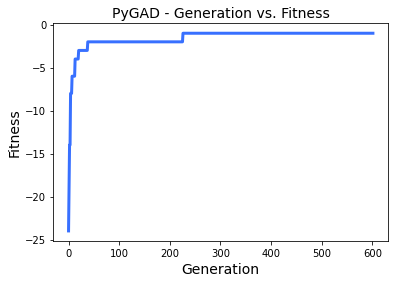

In [11]:
#II KAKURO 5x5
#podsumowanie: najlepsze znalezione rozwiazanie (chromosom+ocena)
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution: {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))


#czas
print("Time elapsed: {time_e}".format(time_e=time_e) + "\n")

print("Found solution:")
print_kakuro(fill_in(solution))

print("Correct solution:")
print_kakuro(solved_kakuro)

#wyswietlenie wykresu: jak zmieniala sie ocena na przestrzeni pokolen
ga_instance.plot_fitness()

Parameters of the best solution: [3. 9. 9. 3. 1. 8. 8. 1. 2. 5. 6. 2.]
Fitness value of the best solution = -4
Time elapsed: 3.532010793685913

Found solution:
['*', '*', '*', [0, 7], [0, 24]]
['*', [0, 24], [12, 6], 3, 9]
[[21, 0], 9, 3, 1, 8]
[[16, 0], 8, 1, 2, 5]
[[8, 0], 6, 2, '*', '*']
Correct solution:
['*', '*', '*', [0, 7], [0, 24]]
['*', [0, 24], [12, 6], 4, 8]
[[21, 0], 9, 3, 2, 7]
[[16, 0], 8, 2, 1, 9]
[[8, 0], 7, 1, '*', '*']


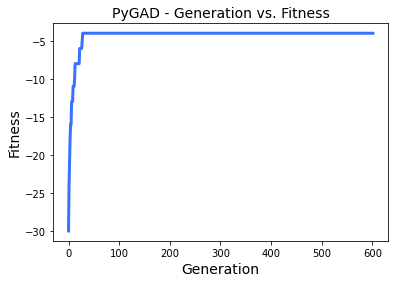

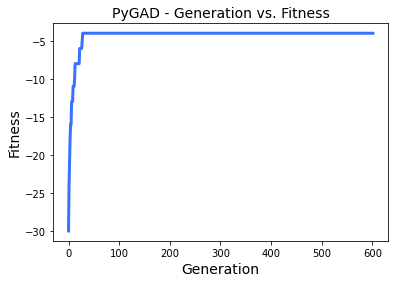

In [18]:
#III KAKURO 5x5
#podsumowanie: najlepsze znalezione rozwiazanie (chromosom+ocena)
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution: {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))


#czas
print("Time elapsed: {time_e}".format(time_e=time_e) + "\n")

print("Found solution:")
print_kakuro(fill_in(solution))

print("Correct solution:")
print_kakuro(solved_kakuro)

#wyswietlenie wykresu: jak zmieniala sie ocena na przestrzeni pokolen
ga_instance.plot_fitness()

Parameters of the best solution: [9. 3. 3. 6. 7. 9. 1. 8. 9. 7. 2. 5. 6. 1. 2. 8. 7. 4. 1. 2. 5. 5. 8. 4.
 7. 9. 2. 3. 8. 4.]
Fitness value of the best solution= -9
Time elapsed: 7.290922403335571

Found solution:
['*', '*', '*', [0, 24], [0, 10], '*', '*', '*']
['*', '*', [12, 30], 9, 3, [0, 16], [0, 21], '*']
['*', [26, 0], 3, 6, 7, 9, 1, '*']
['*', [17, 13], 8, 9, [8, 0], 7, 2, [0, 3]]
[[11, 0], 5, 6, '*', '*', [0, 7], 1, 2]
[[14, 0], 8, 7, [0, 12], '*', [5, 11], 4, 1]
['*', [7, 0], 2, 5, [13, 17], 5, 8, '*']
['*', [25, 0], 4, 7, 9, 2, 3, '*']
['*', '*', '*', [12, 0], 8, 4, '*', '*']
Correct solution:
['*', '*', '*', [0, 24], [0, 10], '*', '*', '*']
['*', '*', [12, 30], 8, 4, [0, 16], [0, 21], '*']
['*', [26, 0], 1, 7, 6, 9, 3, '*']
['*', [17, 13], 8, 9, [8, 0], 7, 1, [0, 3]]
[[11, 0], 8, 3, '*', '*', [0, 7], 5, 2]
[[14, 0], 5, 9, [0, 12], '*', [5, 11], 4, 1]
['*', [7, 0], 4, 3, [13, 17], 7, 6, '*']
['*', [25, 0], 5, 9, 8, 1, 2, '*']
['*', '*', '*', [12, 0], 9, 3, '*', '*']


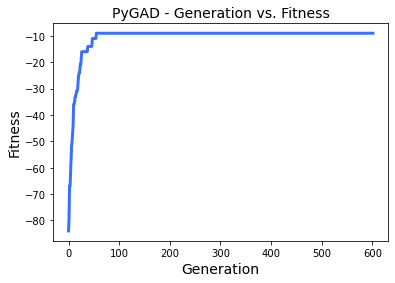

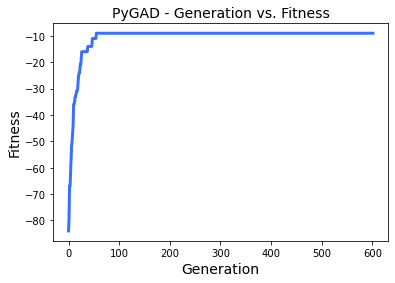

In [22]:
#I KAKURO 9X8
#podsumowanie: najlepsze znalezione rozwiazanie (chromosom+ocena)
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution: {solution}".format(solution=solution))
print("Fitness value of the best solution= {solution_fitness}".format(solution_fitness=solution_fitness))


#czas
print("Time elapsed: {time_e}".format(time_e=time_e) + "\n")

print("Found solution:")
print_kakuro(fill_in(solution))

print("Correct solution:")
print_kakuro(solved_kakuro)

#wyswietlenie wykresu: jak zmieniala sie ocena na przestrzeni pokolen
ga_instance.plot_fitness()

Parameters of the best solution: [2. 4. 5. 9. 8. 7. 1. 6. 5. 9. 9. 2. 5. 6. 7. 3. 8. 4. 2. 8. 8. 9. 8. 5.
 9. 3. 3. 2. 8. 4. 6. 3. 2. 7.]
Fitness value of the best solution = -4
Time elapsed: 7.924941539764404

Found solution:
['*', '*', '*', [0, 11], [0, 12], '*', '*', '*']
['*', '*', [6, 21], 2, 4, [0, 24], [0, 3], [0, 11]]
['*', [36, 11], 5, 9, 8, 7, 1, 6]
[[14, 0], 5, 9, '*', [16, 5], 9, 2, 5]
[[13, 0], 6, 7, [11, 17], 3, 8, [0, 20], [0, 11]]
['*', [0, 12], [7, 11], 4, 2, [16, 0], 8, 8]
[[22, 0], 9, 8, 5, [0, 6], [12, 13], 9, 3]
[[26, 0], 3, 2, 8, 4, 6, 3, '*']
['*', '*', '*', [9, 0], 2, 7, '*', '*']
Correct solution:
['*', '*', '*', [0, 11], [0, 12], '*', '*', '*']
['*', '*', [6, 21], 2, 4, [0, 24], [0, 3], [0, 11]]
['*', [36, 11], 5, 9, 8, 7, 1, 6]
[[14, 0], 5, 9, '*', [16, 5], 9, 2, 5]
[[13, 0], 6, 7, [11, 17], 3, 8, [0, 20], [0, 11]]
['*', [0, 12], [7, 11], 5, 2, [16, 0], 9, 7]
[[22, 0], 5, 9, 8, [0, 6], [12, 13], 8, 4]
[[26, 0], 7, 2, 4, 1, 9, 3, '*']
['*', '*', '*', [9, 0], 5

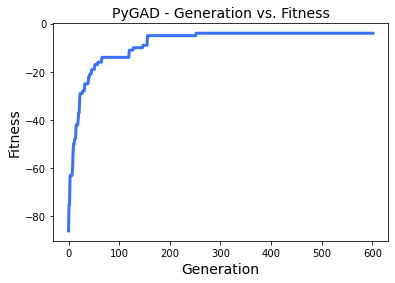

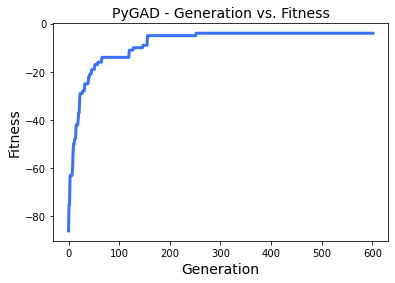

In [25]:
#II KAKURO 9X8
#podsumowanie: najlepsze znalezione rozwiazanie (chromosom+ocena)
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution: {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))


#czas
print("Time elapsed: {time_e}".format(time_e=time_e) + "\n")

print("Found solution:")
print_kakuro(fill_in(solution))

print("Correct solution:")
print_kakuro(solved_kakuro)

#wyswietlenie wykresu: jak zmieniala sie ocena na przestrzeni pokolen
ga_instance.plot_fitness()

Parameters of the best solution: [1. 7. 1. 7. 3. 2. 2. 4. 7. 5. 2. 2. 6. 9. 8. 9. 4. 7. 2. 6. 1. 5. 5. 2.
 4. 5. 3. 9. 3. 1.]
Fitness value of the best solution = -34
Time elapsed: 7.5247414112091064

Found solution:
['*', '*', '*', [0, 14], [0, 10], '*', '*', '*']
['*', '*', [8, 3], 1, 7, [0, 8], '*', '*']
['*', [14, 0], 1, 7, 3, 2, [0, 11], [0, 7]]
['*', [6, 0], 2, 4, [15, 9], 7, 5, 2]
['*', [0, 15], [10, 5], 2, 6, [21, 4], 9, 8]
[[13, 0], 9, 4, [12, 9], 7, 2, [0, 7], '*']
[[12, 0], 6, 1, 5, [7, 7], 5, 2, '*']
['*', '*', [21, 0], 4, 5, 3, 9, '*']
['*', '*', '*', [4, 0], 3, 1, '*', '*']
Correct solution:
['*', '*', '*', [0, 14], [0, 10], '*', '*', '*']
['*', '*', [8, 3], 2, 6, [0, 8], '*', '*']
['*', [14, 0], 2, 1, 4, 7, [0, 11], [0, 7]]
['*', [6, 0], 1, 5, [15, 9], 1, 8, 6]
['*', [0, 15], [10, 5], 6, 4, [4, 21], 3, 1]
[[13, 0], 9, 4, [12, 9], 5, 7, [0, 7], '*']
[[12, 0], 6, 1, 5, [7, 7], 2, 5, '*']
['*', '*', [21, 0], 4, 6, 9, 2, '*']
['*', '*', '*', [4, 0], 1, 3, '*', '*']


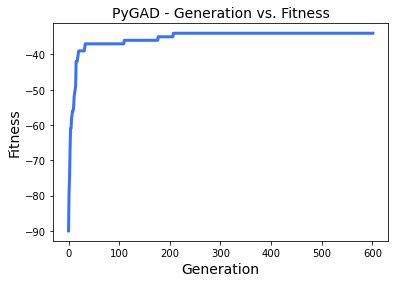

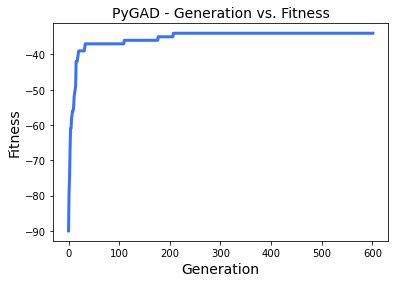

In [35]:
#III KAKURO 9x8
#podsumowanie: najlepsze znalezione rozwiazanie (chromosom+ocena)
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution: {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))

#czas
print("Time elapsed: {time_e}".format(time_e=time_e) + "\n")

print("Found solution:")
print_kakuro(fill_in(solution))

print("Correct solution:")
print_kakuro(solved_kakuro)

#wyswietlenie wykresu: jak zmieniala sie ocena na przestrzeni pokolen
ga_instance.plot_fitness()

In [50]:
#Wybrane parametry
sol_per_pop = 100
num_genes = counted(blank_kakuro) #liczba pustych pól w danym kakuro
num_parents_mating = 50 #(ok. 50%)
num_generations = 700
keep_parents = 4 #mały %
parent_selection_type = "tournament"
crossover_type = "single_point"
mutation_type = 'random'
mutation_percent_genes = 0.1

start_time = time.time() #mierzenie czasu

ga_instance = pygad.GA(gene_space=gene_space,
                    num_generations=num_generations,
                    num_parents_mating=num_parents_mating,
                    fitness_func=fitness_function,
                    sol_per_pop=sol_per_pop,
                    num_genes=num_genes,
                    parent_selection_type=parent_selection_type,
                    keep_parents=keep_parents,
                    crossover_type=crossover_type,
                    mutation_type=mutation_type,
                    mutation_percent_genes=mutation_percent_genes
            
                    )

ga_instance.run()
end_time = time.time()
time_e = end_time - start_time

Parameters of the best solution: [1. 9. 3. 8. 9. 3. 8. 1. 3. 9. 1. 7. 8. 3. 2. 7. 4. 2. 8. 7. 6. 3. 2. 1.
 9. 8. 4. 1. 9. 1. 9. 7. 2. 5. 7. 2. 2. 8. 2. 6. 9. 6. 3. 7. 6. 1. 2. 1.
 9. 4. 7. 9. 7. 1. 4. 7. 2. 4. 1. 5. 2. 8. 4. 7. 1. 9. 2. 8. 7. 4. 3. 9.
 8. 3. 9. 1. 1. 9. 2. 2. 2. 8. 3. 2. 8. 4. 6. 2. 9. 7. 1. 5. 7. 1. 9. 3.
 1. 8. 9. 1. 3. 8. 9. 7. 2. 8. 1. 3. 1. 7. 9. 2.]
Fitness value of the best solution = -28
Time elapsed: 48.71883702278137

Found solution:
['*', '*', [0, 4], [0, 17], '*', '*', '*', '*', [0, 4], [0, 17], [0, 30], '*', '*', '*', '*']
['*', [11, 0], 1, 9, [0, 11], [0, 6], '*', [19, 16], 3, 8, 9, '*', [0, 4], [0, 3], [0, 16]]
['*', [15, 0], 3, 8, 1, 3, [25, 17], 9, 1, 7, 8, [11, 4], 3, 2, 7]
['*', '*', '*', [21, 30], 4, 2, 8, 7, [0, 6], [21, 24], 6, 3, 2, 1, 9]
['*', '*', [22, 11], 8, 4, 1, 9, [19, 0], 1, 9, 7, 2, '*', '*', '*']
['*', [14, 0], 5, 7, 2, [0, 29], [0, 16], [10, 0], 2, 8, [0, 29], [0, 6], '*', '*', '*']
['*', [8, 4], 2, 6, [15, 7], 9, 6, [17, 0], 3, 7, 6, 

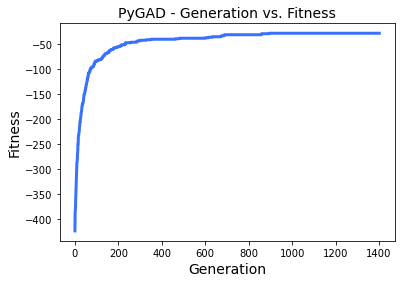

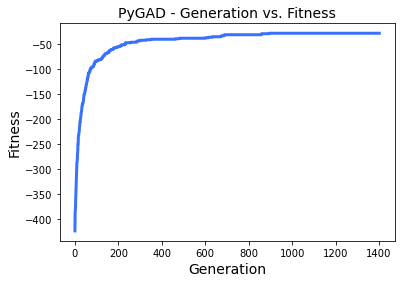

In [39]:
#I KAKURO 15x15
#podsumowanie: najlepsze znalezione rozwiazanie (chromosom+ocena)
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution: {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))

#czas
print("Time elapsed: {time_e}".format(time_e=time_e) + "\n")

print("Found solution:")
print_kakuro(fill_in(solution))

print("Correct solution:")
print_kakuro(solved_kakuro)

#wyswietlenie wykresu: jak zmieniala sie ocena na przestrzeni pokolen
ga_instance.plot_fitness()

Parameters of the best solution: [2. 3. 8. 9. 4. 1. 9. 4. 1. 1. 9. 8. 6. 4. 7. 2. 8. 3. 2. 9. 7. 8. 1. 3.
 9. 4. 2. 9. 3. 8. 2. 9. 8. 2. 1. 8. 1. 9. 1. 7. 9. 8. 3. 9. 9. 1. 8. 1.
 2. 9. 2. 6. 4. 8. 1. 9. 2. 7. 4. 4. 9. 1. 2. 8. 3. 1. 4. 7. 8. 2. 1. 9.
 8. 2. 1. 9. 7. 1. 9. 4. 7. 1. 8. 9. 2. 1. 9. 2. 3. 1. 9. 2. 7. 1. 2. 9.
 3. 8. 1. 3. 6. 4. 3. 8. 1. 9.]
Fitness value of the best solution = -23
Time elapsed: 48.252625703811646

Found solution:
['*', [0, 3], [0, 4], [0, 17], '*', [0, 23], [0, 11], '*', '*', [0, 7], [0, 17], [0, 10], '*', '*', '*']
[[13, 0], 2, 3, 8, [13, 16], 9, 4, '*', [14, 17], 1, 9, 4, '*', [0, 4], [0, 17]]
[[29, 0], 1, 1, 9, 8, 6, 4, [20, 4], 7, 2, 8, 3, [12, 17], 2, 9]
['*', [0, 3], [0, 16], [32, 17], 7, 8, 1, 3, 9, 4, [22, 17], 2, 9, 3, 8]
[[18, 0], 2, 9, 8, [0, 16], [3, 0], 2, 1, '*', [18, 10], 8, 1, 9, '*', '*']
[[25, 0], 1, 7, 9, 8, [0, 3], '*', '*', [12, 23], 3, 9, '*', '*', '*', '*']
['*', '*', '*', [11, 0], 9, 1, [0, 29], [8, 7], 8, 1, '*', '*', '*', '*', '*

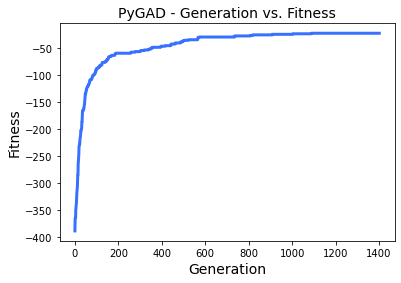

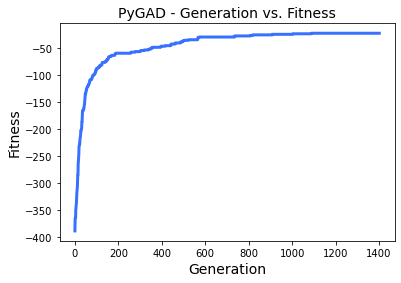

In [43]:
#II KAKURO 15x15
#podsumowanie: najlepsze znalezione rozwiazanie (chromosom+ocena)
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution: {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))

#czas
print("Time elapsed: {time_e}".format(time_e=time_e) + "\n")

print("Found solution:")
print_kakuro(fill_in(solution))

print("Correct solution:")
print_kakuro(solved_kakuro)

#wyswietlenie wykresu: jak zmieniala sie ocena na przestrzeni pokolen
ga_instance.plot_fitness()

Parameters of the best solution: [7. 4. 8. 2. 9. 6. 2. 1. 9. 3. 8. 1. 3. 6. 4. 1. 2. 2. 3. 9. 7. 5. 4. 3.
 1. 8. 3. 9. 8. 4. 1. 9. 2. 7. 5. 3. 8. 1. 9. 8. 1. 6. 4. 1. 7. 8. 9. 5.
 3. 1. 2. 6. 9. 8. 2. 3. 9. 3. 2. 8. 6. 7. 1. 4. 6. 1. 3. 7. 2. 3. 6. 1.
 8. 7. 9. 4. 8. 3. 4. 2. 5. 9. 8. 9. 1. 6. 4. 1. 4. 7. 8. 3. 9. 5. 1. 9.
 1. 4.]
Fitness value of the best solution = -57
Time elapsed: 46.68117570877075

Found solution:
['*', '*', [0, 16], [0, 10], '*', [0, 17], [0, 4], [0, 34], '*', '*', '*', '*', '*', '*', '*']
['*', [10, 0], 7, 4, [19, 4], 8, 2, 9, '*', '*', '*', '*', '*', '*', '*']
['*', [29, 0], 6, 2, 1, 9, 3, 8, [0, 10], '*', '*', '*', '*', [0, 4], [0, 3]]
['*', '*', [5, 15], 1, 3, '*', [10, 17], 6, 4, '*', '*', '*', [3, 11], 1, 2]
['*', [5, 23], 2, 3, '*', [21, 30], 9, 7, 5, '*', '*', [9, 17], 4, 3, 1]
[[11, 0], 8, 3, '*', [23, 4], 9, 8, 4, 1, [0, 17], [11, 0], 9, 2, '*', '*']
[[12, 0], 7, 5, [11, 0], 3, 8, '*', [9, 0], 1, 9, [10, 30], 8, 1, [0, 16], '*']
[[10, 0], 6, 4, [10, 10]

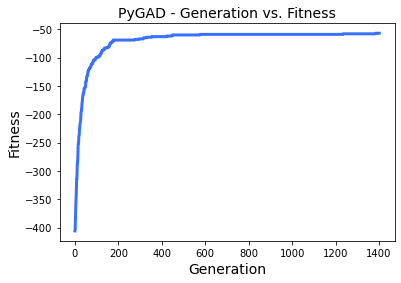

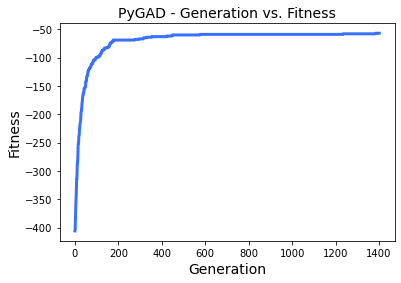

In [51]:
#III KAKURO 15x15
#podsumowanie: najlepsze znalezione rozwiazanie (chromosom+ocena)
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution: {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))

#czas
print("Time elapsed: {time_e}".format(time_e=time_e) + "\n")

print("Found solution:")
print_kakuro(fill_in(solution))

print("Correct solution:")
print_kakuro(solved_kakuro)

#wyswietlenie wykresu: jak zmieniala sie ocena na przestrzeni pokolen
ga_instance.plot_fitness()

Sprawdzanie efektywności algorytmu genetycznego

In [52]:
blank_kakuro_1 = [
    ['*',[0,17],[0,6],'*','*'],
    [[11,0],'_','_',[0,24],'*'],
    [[17,0],'_','_','_',[0,3]],
    ['*',[11,0],'_','_','_'],
    ['*','*',[11,0],'_','_']
]

solved_kakuro_1 = [
    ['*',[0,17],[0,6],'*','*'],
    [[11,0], 8, 3,[0,24],'*'],
    [[17,0], 9, 1, 7,[0,3]],
    ['*',[11,0], 2, 8, 1],
    ['*','*',[11,0], 9, 2]
]

blank_kakuro_2 = [
    ['*','*','*',[0,6],[0,17]],
    ['*','*',[11,23],'_','_'],
    ['*',[19,17],'_','_','_'],
    [[16,0],'_','_','_','*'],
    [[17,0],'_','_','*','*']
]

solved_kakuro_2 = [
    ['*','*','*',[0,6],[0,17]],
    ['*','*',[11,23], 3, 8],
    ['*',[19,17], 8, 2, 9],
    [[16,0], 9, 6, 1,'*'],
    [[17,0], 8, 9,'*','*']
]

blank_kakuro_3 = [
    ['*','*','*',[0,7],[0,24]],
    ['*',[0,24],[12,6],'_','_'],
    [[21,0],'_','_','_','_'],
    [[16,0],'_','_','_','_'],
    [[8,0],'_','_','*','*']
]

solved_kakuro_3 = [
    ['*','*','*',[0,7],[0,24]],
    ['*',[0,24],[12,6], 4, 8],
    [[21,0], 9, 3, 2, 7],
    [[16,0], 8, 2, 1, 9],
    [[8,0], 7, 1,'*','*']
]

s_inputs_blank = [blank_kakuro_1, blank_kakuro_2, blank_kakuro_3]
s_inputs_solved = [solved_kakuro_1, solved_kakuro_2, solved_kakuro_3]

In [57]:
s_solved_kakuro = 0
time_e = 0
for i in range(100):
    blank_kakuro = random.choice(s_inputs_blank)
    sol_per_pop = 100
    num_genes = counted(blank_kakuro) 
    num_parents_mating = 50 
    num_generations = 300
    keep_parents = 4 
    parent_selection_type = "tournament"
    crossover_type = "single_point"
    mutation_type = 'random'
    mutation_percent_genes = 0.1
    
    ga_instance = pygad.GA(gene_space=gene_space,
                        num_generations=num_generations,
                        num_parents_mating=num_parents_mating,
                        fitness_func=fitness_function,
                        sol_per_pop=sol_per_pop,
                        num_genes=num_genes,
                        parent_selection_type=parent_selection_type,
                        keep_parents=keep_parents,
                        crossover_type=crossover_type,
                        mutation_type=mutation_type,
                        mutation_percent_genes=mutation_percent_genes,
                        stop_criteria = ["reach_0"])
    start_time = time.time()
    ga_instance.run()
    end_time = time.time()
    solution, solution_fitness, solution_idx = ga_instance.best_solution()
    if solution_fitness == 0:
        s_solved_kakuro += 1
        time_e += end_time - start_time

print("Solved kakuros: ", s_solved_kakuro)
print("Average time elapsed: ", time_e / s_solved_kakuro)

Solved kakuros:  24
Average time elapsed:  0.8556523323059082


In [58]:
blank_kakuro_1 = [
    ['*','*','*',[0,24],[0,10],'*','*','*'],
    ['*','*',[12,30],'_','_',[0,16],[0,21],'*'],
    ['*',[26,0],'_','_','_','_','_','*'],
    ['*',[17,13],'_','_',[8,0],'_','_',[0,3]],
    [[11,0],'_','_','*','*',[0,7],'_','_'],
    [[14,0],'_','_',[0,12],'*',[5,11],'_','_'],
    ['*',[7,0],'_','_',[13,17],'_','_','*'],
    ['*',[25,0],'_','_','_','_','_','*'],
    ['*','*','*',[12,0],'_','_','*','*']
]

solved_kakuro_1 = [
    ['*','*','*',[0,24],[0,10],'*','*','*'],
    ['*','*',[12,30], 8, 4,[0,16],[0,21],'*'],
    ['*',[26,0], 1, 7, 6, 9, 3,'*'],
    ['*',[17,13], 8, 9,[8,0], 7, 1,[0,3]],
    [[11,0], 8, 3,'*','*',[0,7], 5, 2],
    [[14,0], 5, 9,[0,12],'*',[5,11], 4, 1],
    ['*',[7,0], 4, 3,[13,17], 7, 6,'*'],
    ['*',[25,0], 5, 9, 8, 1, 2,'*'],
    ['*','*','*',[12,0], 9, 3,'*','*']
]

blank_kakuro_2 = [
    ['*','*','*',[0,11],[0,12],'*','*','*'],
    ['*','*',[6,21],'_','_',[0,24],[0,3],[0,11]],
    ['*',[36,11],'_','_','_','_','_','_'],
    [[14,0],'_','_','*',[16,5],'_','_','_'],
    [[13,0],'_','_',[11,17],'_','_',[0,20],[0,11]],
    ['*',[0,12],[7,11],'_','_',[16,0],'_','_'],
    [[22,0],'_','_','_',[0,6],[12,13],'_','_'],
    [[26,0],'_','_','_','_','_','_','*'],
    ['*','*','*',[9,0],'_','_','*','*']
]
    
solved_kakuro_2 = [
    ['*','*','*',[0,11],[0,12],'*','*','*'],
    ['*','*',[6,21], 2, 4,[0,24],[0,3],[0,11]],
    ['*',[36,11], 5, 9, 8, 7, 1, 6],
    [[14,0], 5, 9,'*',[16,5], 9, 2, 5],
    [[13,0], 6, 7,[11,17], 3, 8,[0,20],[0,11]],
    ['*',[0,12],[7,11], 5, 2,[16,0], 9, 7],
    [[22,0], 5, 9, 8,[0,6],[12,13], 8, 4],
    [[26,0], 7, 2, 4, 1, 9, 3,'*'],
    ['*','*','*',[9,0], 5, 4,'*','*']
]

blank_kakuro_3 = [
    ['*','*','*',[0,14],[0,10],'*','*','*'],
    ['*','*',[8,3],'_','_',[0,8],'*','*'],
    ['*',[14,0],'_','_','_','_',[0,11],[0,7]],
    ['*',[6,0],'_','_',[15,9],'_','_','_'],
    ['*',[0,15],[10,5],'_','_',[21,4],'_','_'],
    [[13,0],'_','_',[12,9],'_','_',[0,7],'*'],
    [[12,0],'_','_','_',[7,7],'_','_','*'],
    ['*','*',[21,0],'_','_','_','_','*'],
    ['*','*','*',[4,0],'_','_','*','*']
]

solved_kakuro_3 = [
    ['*','*','*',[0,14],[0,10],'*','*','*'],
    ['*','*',[8,3], 2, 6,[0,8],'*','*'],
    ['*',[14,0], 2, 1, 4, 7,[0,11],[0,7]],
    ['*',[6,0], 1, 5,[15,9], 1, 8, 6],
    ['*',[0,15],[10,5], 6, 4,[4,21], 3, 1],
    [[13,0], 9, 4,[12,9], 5, 7,[0,7],'*'],
    [[12,0], 6, 1, 5,[7,7], 2, 5,'*'],
    ['*','*',[21,0], 4, 6, 9, 2,'*'],
    ['*','*','*',[4,0], 1, 3,'*','*']
]

m_inputs_blank = [blank_kakuro_1, blank_kakuro_2, blank_kakuro_3]
m_inputs_solved = [solved_kakuro_1, solved_kakuro_2, solved_kakuro_3]

In [59]:
m_solved_kakuro = 0
time_e = 0
for i in range(100):
    blank_kakuro = random.choice(m_inputs_blank)
    sol_per_pop = 100
    num_genes = counted(blank_kakuro) 
    num_parents_mating = 50 
    num_generations = 300
    keep_parents = 4 
    parent_selection_type = "tournament"
    crossover_type = "single_point"
    mutation_type = 'random'
    mutation_percent_genes = 0.1
    
    ga_instance = pygad.GA(gene_space=gene_space,
                        num_generations=num_generations,
                        num_parents_mating=num_parents_mating,
                        fitness_func=fitness_function,
                        sol_per_pop=sol_per_pop,
                        num_genes=num_genes,
                        parent_selection_type=parent_selection_type,
                        keep_parents=keep_parents,
                        crossover_type=crossover_type,
                        mutation_type=mutation_type,
                        mutation_percent_genes=mutation_percent_genes,
                        stop_criteria = ["reach_0"])
    start_time = time.time()
    ga_instance.run()
    end_time = time.time()
    solution, solution_fitness, solution_idx = ga_instance.best_solution()
    if solution_fitness == 0:
        m_solved_kakuro += 1
        time_e += end_time - start_time

print("Solved kakuros: ", m_solved_kakuro)
if m_solved_kakuro != 0:
    print("Average time elapsed: ", time_e / m_solved_kakuro)

Solved kakuros:  0


ZeroDivisionError: division by zero

In [62]:
blank_kakuro_1 = [['*','*',[0,4],[0,17],'*','*','*','*',[0,4],[0,17],[0,30],'*','*','*','*'],
                ['*',[11,0],'_','_',[0,11],[0,6],'*',[19,16],'_','_','_','*',[0,4],[0,3],[0,16]],
                ['*', [15,0],'_','_','_','_',[25,17],'_','_','_','_',[11,4],'_','_','_'],
                ['*','*','*',[21,30],'_','_','_','_',[0,6],[21,24],'_','_','_','_','_'],
                ['*','*',[22,11],'_','_','_','_',[19,0],'_','_','_','_','*','*','*'],
                ['*',[14,0],'_','_','_',[0,29],[0,16],[10,0],'_','_',[0,29],[0,6],'*','*','*'],
                ['*',[8,4],'_','_',[15,7],'_','_',[17,0],'_','_','_','_','*',[0,10],[0,17]],
                [[32,0],'_','_','_','_','_','_','*','*',[8,4],'_','_',[11,30],'_','_'],
                [[6,0],'_','_',[7,0],'_','_',[0,24],[0,7],[31,0],'_','_','_','_','_','_'],
                ['*','*','*',[22,0],'_','_','_','_',[12,0],'_','_',[11,10],'_','_','*'],
                ['*','*','*','*',[0,3],[10,11],'_','_','*',[0,3],[13,24],'_','_','_','*'],
                ['*',[0,3],[0,17],[15,16],'_','_','_','_',[19,17],'_','_','_','_','*','*'],
                [[23,0],'_','_','_','_','_',[0,4],[20,16],'_','_','_','_',[0,16],[0,3],'*'],
                [[18,0],'_','_','_',[20,0],'_','_','_','_',[18,0],'_','_','_','_','*'],
                ['*','*','*','*',[11,0],'_','_','_','*','*','*',[11,0],'_','_','*']
                
]

solved_kakuro_1 = [['*','*',[0,4],[0,17],'*','*','*','*',[0,4],[0,17],[0,30],'*','*','*','*'],
                ['*',[11,0], 3, 8,[0,11],[0,6],'*',[19,16], 3, 9, 7,'*',[0,4],[0,3],[0,16]],
                ['*', [15,0], 1, 9, 3, 2,[25,17], 7, 1, 8, 9,[11,4], 3, 1, 7],
                ['*','*','*',[21,30], 1, 3, 8, 9,[0,6],[21,24], 6, 3, 1, 2, 9],
                ['*','*',[22,11], 7, 5, 1, 9,[19,0], 3, 7, 8, 1,'*','*','*'],
                ['*',[14,0], 3, 9, 2,[0,29],[0,16],[10,0], 2, 8,[0,29],[0,6],'*','*','*'],
                ['*',[8,4], 2, 6,[15,7], 8, 7,[17,0], 1, 9, 5, 2,'*',[0,10],[0,17]],
                [[32,0], 3, 1, 8, 4, 7, 9,'*','*',[8,4], 7, 1,[11,30], 3, 8],
                [[6,0], 1, 5,[7,0], 2, 5,[0,24],[0,7],[31,0], 1, 8, 3, 6, 4, 9],
                ['*','*','*',[22,0], 1, 9, 8, 4,[12,0], 3, 9,[11,10], 9, 2,'*'],
                ['*','*','*','*',[0,3],[10,11], 9, 1,'*',[0,3],[13,24], 4, 8, 1,'*'],
                ['*',[0,3],[0,17],[15,16], 1, 5, 7,2,[19,17], 2, 9, 1, 7,'*','*'],
                [[23,0], 1, 8, 9, 2, 3,[0,4],[20,16], 9, 1, 7, 3,[0,16],[0,3],'*'],
                [[18,0], 2, 9, 7,[20,0], 2, 1, 9, 8,[18,0], 8, 2, 7, 1,'*'],
                ['*','*','*','*',[11,0], 1, 3, 7,'*','*','*',[11,0], 9, 2,'*']
                
]

blank_kakuro_2 = [['*',[0,3],[0,4],[0,17],'*',[0,23],[0,11],'*','*',[0,7],[0,17],[0,10],'*','*','*'],
                [[13,0],'_','_','_',[13,16],'_','_','*',[14,17],'_','_','_','*',[0,4],[0,17]],
                [[29,0], '_','_','_','_','_','_',[20,4],'_','_','_','_',[12,17],'_','_'],
                ['*',[0,3],[0,16],[32,17],'_','_','_','_','_','_',[22,17],'_','_','_','_'],
                [[18,0],'_','_','_',[0,16],[3,0],'_','_','*',[18,10],'_','_','_','*','*'],
                [[25,0],'_','_','_','_',[0,3],'*','*',[12,23],'_','_','*','*','*','*'],
                ['*','*','*',[11,0],'_','_',[0,29],[8,7],'_','_','*','*','*','*','*'],
                ['*','*','*','*',[23,0],'_','_','_','_','_',[0,17],'*','*','*','*'],
                ['*','*','*','*','*',[27,0],'_','_','_','_','_',[0,4],'*','*','*'],
                ['*','*','*','*','*',[8,3],'_','_','*',[10,0],'_','_',[0,3],[0,4],[0,17]],
                ['*','*','*',[0,17],[10,10],'_','_','*',[0,17],[0,28],[15,0],'_','_','_','_'],
                ['*',[0,16],[12,3],'_','_','_',[0,24],[17,3],'_','_',[0,6],[12,3],'_','_','_'],
                [[21,0],'_','_','_','_',[28,4],'_','_','_','_','_','_',[0,16],[0,4],[0,17]],
                [[11,0],'_','_',[15,0],'_','_','_','_',[30,0],'_','_','_','_','_','_'],
                ['*','*','*',[10,0],'_','_','_','*',[7,0],'_','_',[18,0],'_','_','_']
                
]

solved_kakuro_2 = [['*',[0,3],[0,4],[0,17],'*',[0,23],[0,11],'*','*',[0,7],[0,17],[0,10],'*','*','*'],
                [[13,0], 1, 3, 9,[13,16], 8, 5,'*',[14,17], 2, 9, 3,'*',[0,4],[0,17]],
                [[29,0], 2, 1, 8, 9, 6, 3,[20,4], 9, 1, 8, 2,[12,17], 3, 9],
                ['*',[0,3],[0,16],[32,17], 7, 9, 1, 3, 8, 4,[22,17], 4, 9, 1, 8],
                [[18,0], 2, 7, 9,[0,16],[3,0], 2, 1,'*',[18,10], 9, 1, 8,'*','*'],
                [[25,0], 1, 9, 8, 7,[0,3],'*','*',[12,23], 4, 8,'*','*','*','*'],
                ['*','*','*',[11,0], 9, 2,[0,29],[8,7], 6, 2,'*','*','*','*','*'],
                ['*','*','*','*',[23,0], 1, 9, 2, 8, 3,[0,17],'*','*','*','*'],
                ['*','*','*','*','*',[27,0], 5, 4, 9, 1, 8,[0,4],'*','*','*'],
                ['*','*','*','*','*',[8,3], 7, 1,'*',[10,0], 9, 1,[0,3],[0,4],[0,17]],
                ['*','*','*',[0,17],[10,10], 2, 8,'*',[0,17],[0,28],[15,0], 3, 2, 1, 9],
                ['*',[0,16],[12,3], 8, 3, 1,[0,24],[17,3], 8, 9,[0,6],[12,3],1, 3, 8],
                [[21,0], 7, 1, 9, 4,[28,4], 8, 1, 9, 5, 3, 2,[0,16],[0,4],[0,17]],
                [[11,0], 9, 2,[15,0], 1, 3, 9, 2,[30,0], 8, 2, 1, 7, 3, 9],
                ['*','*','*',[10,0], 2, 1, 7,'*',[7,0], 6, 1,[18,0], 9, 1, 8]
                
]

blank_kakuro_3 = [['*','*',[0,16],[0,10],'*',[0,17],[0,4],[0,34],'*','*','*','*','*','*','*'],
                ['*',[10,0],'_','_',[19,4],'_','_','_','*','*','*','*','*','*','*'],
                ['*',[29,0],'_','_','_','_','_','_',[0,10],'*','*','*','*',[0,4],[0,3]],
                ['*','*',[5,15],'_','_','*',[10,17],'_','_','*','*','*',[3,11],'_','_'],
                ['*',[5,23],'_','_','*',[21,30],'_','_','_','*','*',[9,17],'_','_','_'],
                [[11,0],'_','_','*',[23,4],'_','_','_','_',[0,17],[11,0],'_','_','*','*'],
                [[12,0],'_','_',[11,0],'_','_','*',[9,0],'_','_',[10,30],'_','_',[0,16],'*'],
                [[10,0],'_','_',[10,10],'_','_',[0,17],'*',[17,0],'_','_',[8,4],'_','_',[0,23]],
                ['*',[3,0],'_','_',[15,4],'_','_',[0,30],'*',[9,0],'_','_',[12,0],'_','_'],
                ['*','*',[5,0],'_','_',[15,0],'_','_',[15,0],[8,4],'_','_',[9,0],'_','_'],
                ['*',[0,16],[4,17],'_','_','*',[18,0],'_','_','_','_','*',[8,10],'_','_'],
                [[20,0],'_','_','_','*','*',[15,0],'_','_','_','*',[6,17],'_','_','*'],
                [[16,0],'_','_','*','*','*',[10,0],'_','_',[0,4],[10,16],'_','_',[0,17],'*'],
                ['*','*','*','*','*','*','*',[32,0],'_','_','_','_','_','_','*'],
                ['*','*','*','*','*','*','*',[17,0],'_','_','_',[0,11],'_','_','*']
                
]

solved_kakuro_3 = [['*','*',[0,16],[0,10],'*',[0,17],[0,4],[0,34],'*','*','*','*','*','*','*'],
                ['*',[10,0], 7, 3,[19,4], 9, 3, 7,'*','*','*','*','*','*','*'],
                ['*',[29,0], 9, 2, 3, 8, 1, 6,[0,10],'*','*','*','*',[0,4],[0,3]],
                ['*','*',[5,15], 4, 1,'*',[10,17], 8, 2,'*','*','*',[3,11], 1, 2],
                ['*',[5,23], 4, 1,'*',[21,30], 8, 9, 4,'*','*',[9,17], 5, 3, 1],
                [[11,0], 6, 5,'*',[23,4], 7, 9, 4, 3,[0,17],[11,0], 8, 3,'*','*'],
                [[12,0], 9, 3,[11,0], 3, 8,'*',[9,0], 1, 8,[10,30], 9, 1,[0,16],'*'],
                [[10,0], 8, 2,[10,10], 1, 9,[0,17],'*',[17,0], 9, 8,[8,4], 2, 6,[0,23]],
                ['*',[3,0], 1, 2,[15,4], 6, 9,[0,30],'*',[9,0], 6, 3,[12,0], 3, 9],
                ['*','*',[5,0], 4, 1,[15,0], 8, 7,[15,0],[8,4], 7, 1,[9,0], 1, 8],
                ['*',[0,16],[4,17], 1, 3,'*',[18,0], 6, 2, 1, 9,'*',[8,10], 2, 6],
                [[20,0], 9, 8, 3,'*','*',[15,0], 8, 4, 3,'*',[6,17], 2, 4,'*'],
                [[16,0], 7, 9,'*','*','*',[10,0], 9, 1,[0,4],[10,16], 9, 1,[0,17],'*'],
                ['*','*','*','*','*','*','*',[32,0], 3, 1, 7, 8, 4, 9,'*'],
                ['*','*','*','*','*','*','*',[17,0], 5, 3, 9,[0,11], 3, 8,'*']
]

l_inputs_blank = [blank_kakuro_1, blank_kakuro_2, blank_kakuro_3]
l_inputs_solved = [solved_kakuro_1, solved_kakuro_2, solved_kakuro_3]

In [ ]:
l_solved_kakuro = 0
time_e = 0
for i in range(100):
    blank_kakuro = random.choice(l_inputs_blank)
    sol_per_pop = 400
    num_genes = counted(blank_kakuro) 
    num_parents_mating = 200 
    num_generations = 1000
    keep_parents = 12 
    parent_selection_type = "tournament"
    crossover_type = "single_point"
    mutation_type = 'random'
    mutation_percent_genes = 0.1
    
    ga_instance = pygad.GA(gene_space=gene_space,
                        num_generations=num_generations,
                        num_parents_mating=num_parents_mating,
                        fitness_func=fitness_function,
                        sol_per_pop=sol_per_pop,
                        num_genes=num_genes,
                        parent_selection_type=parent_selection_type,
                        keep_parents=keep_parents,
                        crossover_type=crossover_type,
                        mutation_type=mutation_type,
                        mutation_percent_genes=mutation_percent_genes,
                        stop_criteria = ["reach_0"])
    start_time = time.time()
    ga_instance.run()
    end_time = time.time()
    solution, solution_fitness, solution_idx = ga_instance.best_solution()
    if solution_fitness == 0:
        m_solved_kakuro += 1
        time_e += end_time - start_time

print("Solved kakuros: ", l_solved_kakuro)
if l_solved_kakuro != 0:
    print("Average time elapsed: ", time_e / l_solved_kakuro)

# Podsumowanie


Algorytm genetyczny zdaje się być niezbyt efektywny dla łamigłówki jaką jest kakuro. Może to wynikać ze jest to złożona i stosunkowo skomplikowana gra. Liczba możliwych kombinacji jakie możemy uzyskać poprzez losowe wpisywanie liczb w kratki kakuro oraz warunki, które te liczby muszą spełniać, wpływają negatywnie na jakość oraz czas pracy algorytmu.

# Bibliografia


https://www.kakuros.com/ - przykłady do eksperymentu

https://theory.tifr.res.in/~sgupta/kakuro/

https://pygad.readthedocs.io/en/latest/